Use this as an intro to polarity analysis. (Details to be added later)

In [5]:
import pandas as pd
import os #This is so that we can use os.path.join

In [7]:
data_folder = "../data" #defining a relative path to the data file

excel_file_path = os.path.join(data_folder, "electionTracking.xlsx") #Construct a full path including the Excel file

df = pd.read_excel(excel_file_path)

print(df.head())

        Country Continent  ElectionType ElectionDate  PScoreBefore  \
0  South Africa    Africa       General   2024-05-29         27.37   
1       Namibia    Africa  Presidential   2024-11-27         82.05   
2      Botswana    Africa       General   2024-10-23         30.49   
3      Zimbabwe    Africa       General   2024-03-23         56.18   
4       Lesotho    Africa       General   2023-06-23         40.52   

   PScoreAfter  Difference Fair  
0        28.41        1.04  Yes  
1        62.38      -19.67  Yes  
2        30.00       -0.49  Yes  
3        52.60       -3.58   No  
4        35.00       -5.52  Yes  


In [8]:
df.describe()

,ElectionDate,PScoreBefore,PScoreAfter,Difference
count,56,53.000000,54.000000,55.000000
mean,2024-03-15 21:51:25.714285824,51.383019,52.779259,1.136545
min,2023-04-30 00:00:00,0.000000,5.570000,-49.500000
25%,2023-10-13 00:00:00,37.500000,39.175000,-5.000000
50%,2024-04-01 00:00:00,48.000000,51.915000,0.000000
75%,2024-07-20 06:00:00,60.000000,64.152500,5.650000
max,2024-12-08 00:00:00,100.000000,100.000000,61.000000
std,NaN,21.125255,21.025528,14.269117


The mean for PScoreBefore, PScoreAfter, and Difference suggests that there is a slight tilt to the right before elections, and there was a slight 1% swing to the right. This includes all countries, and there is no filtering out of unfair elections.

Below, we will create dataframes for different subsets of the data:

In [13]:
fairCountries = df[df["Fair"] == "Yes"]
unfairCountries = df[df["Fair"] != "Yes"]
fairAfrica = df[(df["Fair"] == "Yes") & (df["Continent"] == "Africa")]
fairEurope = df[(df["Fair"] == "Yes") & (df["Continent"] == "Europe")]
fairAsia = df[(df["Fair"] == "Yes") & (df["Continent"] == "Asia")]
fairAmericas = df[(df["Fair"] == "Yes") & ((df["Continent"] == "North America") | (df["Continent"] == "South America"))]
fairOceania = df[(df["Fair"] == "Yes") & (df["Continent"] == "Oceania")]
allAfrica = df[df["Continent"] == "Africa"]
allEurope = df[df["Continent"] == "Europe"]
allAsia = df[df["Continent"] == "Asia"]
allAmericas = df[(df["Continent"] == "North America") | (df["Continent"] == "South America")]
allOceania = df[df["Continent"] == "Oceania"]

Below we will see the ratio of fair to unfair elections for each of the continents:

In [16]:
print(len(fairCountries) , " out of " , len(df) , " of the elections in the sample can be considered fair and that's ", (len(fairCountries)/len(df))*100 , "%")
print(len(fairAfrica) , " out of " , len(allAfrica) , " of the African elections in the sample can be considered fair and that's ", (len(fairAfrica)/len(allAfrica))*100 , "%")
print(len(fairEurope) , " out of " , len(allEurope) , " of the European elections in the sample can be considered fair and that's ", (len(fairEurope)/len(allEurope))*100 , "%")
print(len(fairAsia) , " out of " , len(allAsia) , " of the Asian elections in the sample can be considered fair and that's ", (len(fairAsia)/len(allAsia))*100 , "%")
print(len(fairAmericas) , " out of " , len(allAmericas) , " of the Americas' elections in the sample can be considered fair and that's ", (len(fairAmericas)/len(allAmericas))*100 , "%")
print(len(fairOceania) , " out of " , len(allOceania) , " of the Oceania elections in the sample can be considered fair and that's ", (len(fairOceania)/len(allOceania))*100 , "%")

41  out of  57  of the elections in the sample can be considered fair and that's  71.9298245614035 %
9  out of  19  of the African elections in the sample can be considered fair and that's  47.368421052631575 %
11  out of  12  of the European elections in the sample can be considered fair and that's  91.66666666666666 %
11  out of  14  of the Asian elections in the sample can be considered fair and that's  78.57142857142857 %
8  out of  9  of the Americas' elections in the sample can be considered fair and that's  88.88888888888889 %
2  out of  2  of the Oceania elections in the sample can be considered fair and that's  100.0 %


In [18]:
import matplotlib.pyplot as plt

In [19]:
fairnessData = {'Continent' : ["Africa", "Europe", "Asia", "Americas", "Oceania"],
               'Fairness%' : [(len(fairAfrica)/len(allAfrica))*100, (len(fairEurope)/len(allEurope))*100, (len(fairAsia)/len(allAsia))*100, (len(fairAmericas)/len(allAmericas))*100, (len(fairOceania)/len(allOceania))*100]}

In [22]:
fairnessDF = pd.DataFrame(fairnessData)
print(fairnessDF)

  Continent   Fairness%
0    Africa   47.368421
1    Europe   91.666667
2      Asia   78.571429
3  Americas   88.888889
4   Oceania  100.000000


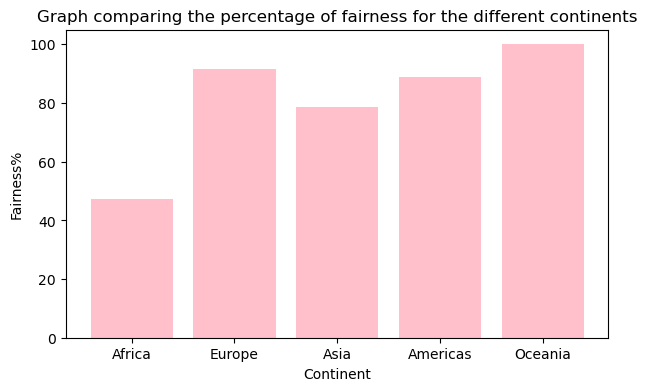

In [58]:
plt.figure(figsize=(7, 4))
plt.bar(fairnessDF['Continent'], fairnessDF['Fairness%'], color='pink')
plt.title("Graph comparing the percentage of fairness for the different continents")
plt.xlabel('Continent')
plt.ylabel('Fairness%')
plt.show()

In [26]:
fairCountries.describe()

,ElectionDate,PScoreBefore,PScoreAfter,Difference
count,41,39.000000,39.000000,41.000000
mean,2024-03-20 16:58:32.195121920,47.054359,47.697949,0.612195
min,2023-04-30 00:00:00,10.000000,5.570000,-49.500000
25%,2023-10-14 00:00:00,37.000000,35.000000,-5.000000
50%,2024-04-16 00:00:00,45.200000,49.400000,0.200000
75%,2024-07-04 00:00:00,55.050000,56.295000,6.300000
max,2024-12-08 00:00:00,95.000000,95.580000,61.000000
std,NaN,17.070412,18.269106,14.761562


Let's define a PScore lower than 45 as a left leaning country, a PScore higher than 55 as right leaning, and anything between 45 and 55 as centrist.

In [54]:
polarityFairBreakdownBefore = { 'Affiliation' : ["Left", "Right","Centrist"],
                               'Percentage' : [(fairCountries['PScoreBefore']<45).sum(), (fairCountries['PScoreBefore']>55).sum(), ((fairCountries['PScoreBefore']>=45)&(fairCountries['PScoreBefore']<=55)).sum()]}

print(polarityFairBreakdownBefore)

{'Affiliation': ['Left', 'Right', 'Centrist'], 'Percentage': [41, 10, 10]}


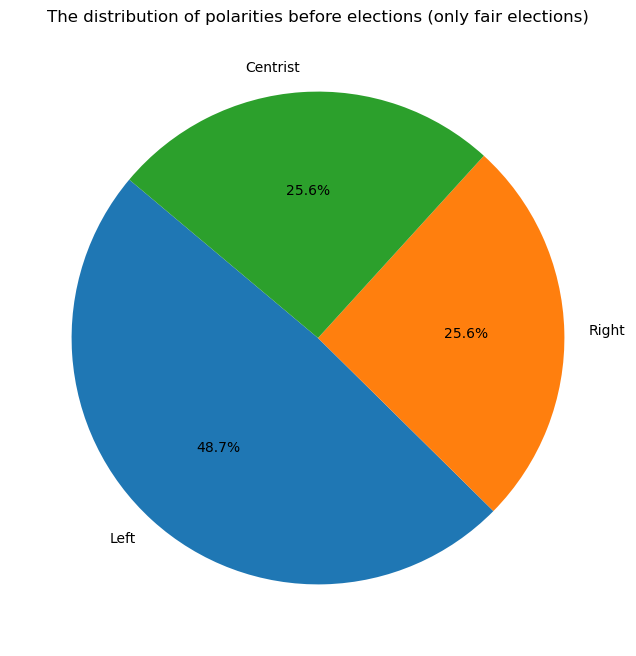

In [48]:
plt.figure(figsize=(8, 8))
plt.pie(polarityFairBreakdownBefore ['Percentage'], labels = polarityFairBreakdownBefore ['Affiliation'], autopct='%1.1f%%', startangle=140)

plt.title("The distribution of polarities before elections (only fair elections)")
plt.show()

In [33]:
polarityFairBreakdownAfter = { 'Affiliation' : ["Left", "Right", "Centrist"],
                               'Percentage' : [(fairCountries['PScoreAfter']<45).sum(), (fairCountries['PScoreAfter']>55).sum(), ((fairCountries['PScoreAfter']>=45)&(fairCountries['PScoreAfter']<=55)).sum()]}

print(polarityFairBreakdownAfter)

{'Affiliation': ['Left', 'Right', 'Centrist'], 'Percentage': [15, 12, 12]}


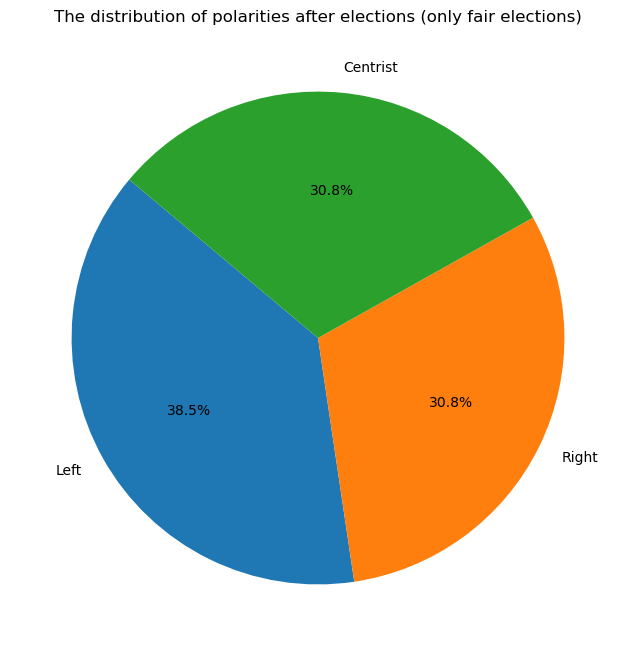

In [35]:
plt.figure(figsize=(8, 8))
plt.pie(polarityFairBreakdownAfter ['Percentage'], labels = polarityFairBreakdownAfter ['Affiliation'], autopct='%1.1f%%', startangle=140)

plt.title("The distribution of polarities after elections (only fair elections)")
plt.show()

Below we are doing a comparison of polarity before and after on the African continent, the dataframe for fair African elections is fairAfrica. And the dictionaries for Africa will be abbreviated from africaPolarityFairBreakdownBefore to APFBB AND africaPolarityFairBreakdownAfter to APFBA.

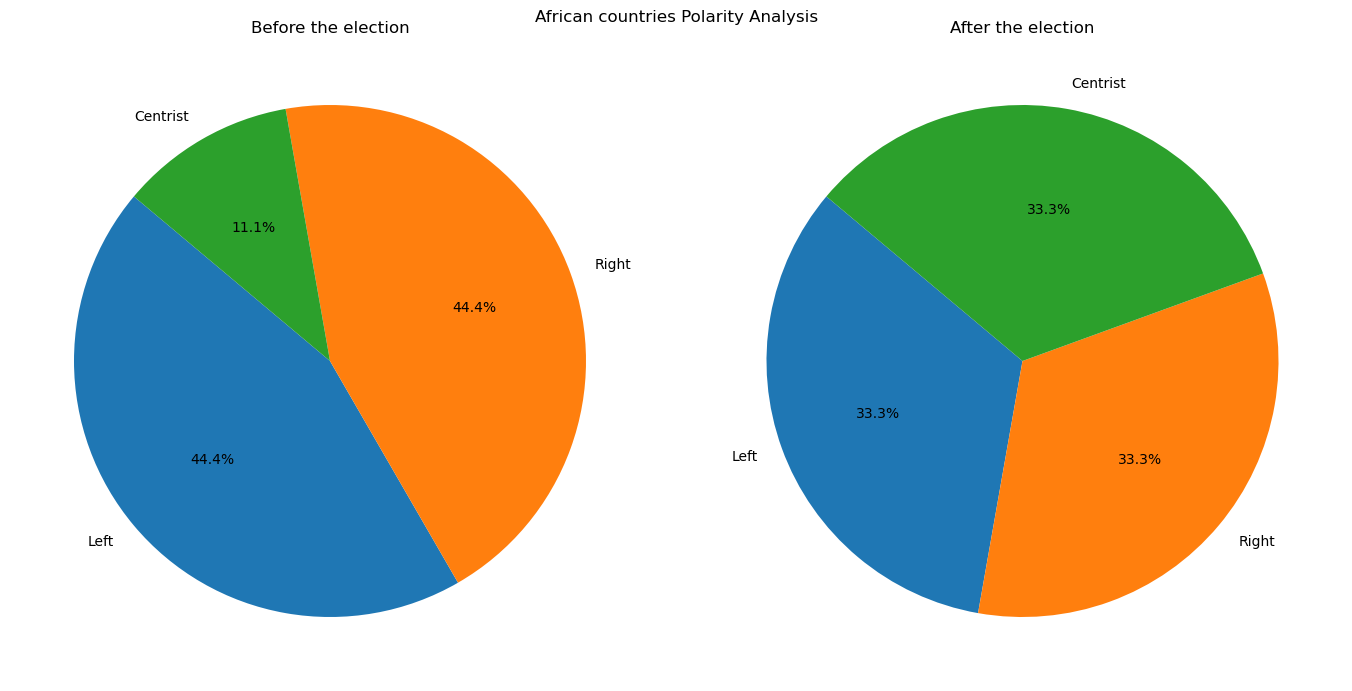

In [38]:
#create a dictionary for the Before values
APFBB = { 'Affiliation' : ["Left", "Right","Centrist"],
                               'Percentage' : [(fairAfrica['PScoreBefore']<45).sum(), (fairAfrica['PScoreBefore']>55).sum(), ((fairAfrica['PScoreBefore']>=45)&(fairAfrica['PScoreBefore']<=55)).sum()]}

#create a dictionary for the After values
APFBA = { 'Affiliation' : ["Left", "Right", "Centrist"],
                               'Percentage' : [(fairAfrica['PScoreAfter']<45).sum(), (fairAfrica['PScoreAfter']>55).sum(), ((fairAfrica['PScoreAfter']>=45)&(fairAfrica['PScoreAfter']<=55)).sum()]}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))

ax1.pie(APFBB['Percentage'], labels = APFBB['Affiliation'], autopct='%1.1f%%', startangle=140)
ax1.set_title("Before the election")

ax2.pie(APFBA['Percentage'], labels = APFBA['Affiliation'], autopct='%1.1f%%', startangle=140)
ax2.set_title("After the election")

fig.suptitle("African countries Polarity Analysis")

plt.tight_layout()

plt.show()

Below we are doing a comparison of polarity before and after on the European continent, the dataframe for fair European elections is fairEurope. And the dictionaries for Europe will be abbreviated from europePolarityFairBreakdownBefore to EPFBB AND europePolarityFairBreakdownAfter to EPFBA.

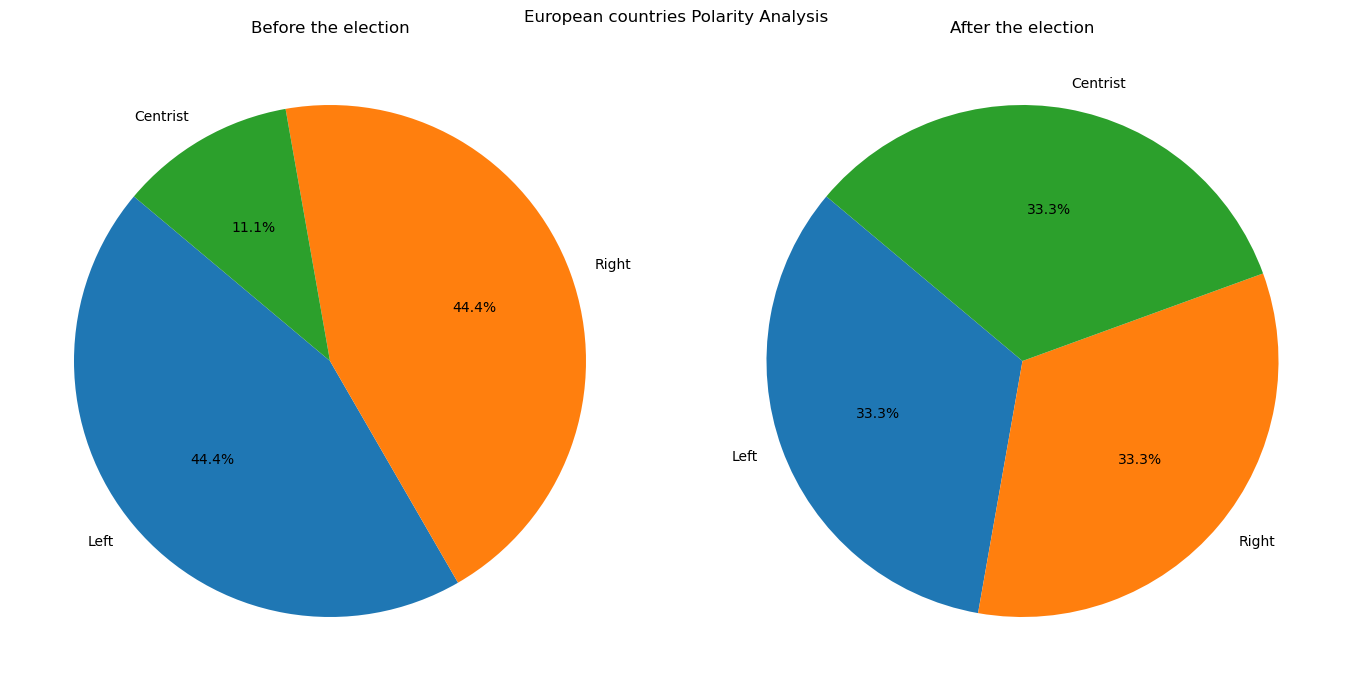

In [62]:
#create a dictionary for the Before values
EPFBB = { 'Affiliation' : ["Left", "Right","Centrist"],
                               'Percentage' : [(fairEurope['PScoreBefore']<45).sum(), (fairEurope['PScoreBefore']>55).sum(), ((fairEurope['PScoreBefore']>=45)&(fairEurope['PScoreBefore']<=55)).sum()]}

#create a dictionary for the After values
EPFBA = { 'Affiliation' : ["Left", "Right", "Centrist"],
                               'Percentage' : [(fairEurope['PScoreAfter']<45).sum(), (fairEurope['PScoreAfter']>55).sum(), ((fairEurope['PScoreAfter']>=45)&(fairEurope['PScoreAfter']<=55)).sum()]}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))

ax1.pie(APFBB['Percentage'], labels = APFBB['Affiliation'], autopct='%1.1f%%', startangle=140)
ax1.set_title("Before the election")

ax2.pie(APFBA['Percentage'], labels = APFBA['Affiliation'], autopct='%1.1f%%', startangle=140)
ax2.set_title("After the election")

fig.suptitle("European countries Polarity Analysis")

plt.tight_layout()

plt.show()